# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

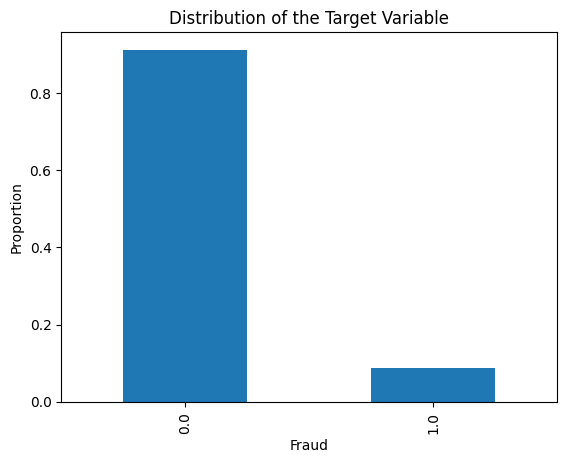

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")

# Check the distribution of the target variable
fraud['fraud'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of the Target Variable')
plt.xlabel('Fraud')
plt.ylabel('Proportion')
plt.show()

# Print the distribution
print(fraud['fraud'].value_counts(normalize=True))


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features and target
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [5]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation using classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

Confusion Matrix:
[[181291   1228]
 [  6916  10565]]


In [6]:
from imblearn.over_sampling import RandomOverSampler

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

# Train the Logistic Regression model on oversampled data
model_oversampled = LogisticRegression(max_iter=1000)
model_oversampled.fit(X_res, y_res)

# Evaluate the model
y_pred_res = model_oversampled.predict(X_test)
print(classification_report(y_test, y_pred_res))
conf_matrix_res = confusion_matrix(y_test, y_pred_res)
print(f"Confusion Matrix after Oversampling:\n{conf_matrix_res}")


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion Matrix after Oversampling:
[[170393  12126]
 [   910  16571]]


In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res_under, y_res_under = rus.fit_resample(X_train, y_train)

# Train the Logistic Regression model on undersampled data
model_undersampled = LogisticRegression(max_iter=1000)
model_undersampled.fit(X_res_under, y_res_under)

# Evaluate the model
y_pred_under = model_undersampled.predict(X_test)
print(classification_report(y_test, y_pred_under))
conf_matrix_under = confusion_matrix(y_test, y_pred_under)
print(f"Confusion Matrix after Undersampling:\n{conf_matrix_under}")


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion Matrix after Undersampling:
[[170385  12134]
 [   918  16563]]


In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model on SMOTE data
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_res_smote, y_res_smote)

# Evaluate the model
y_pred_smote = model_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print(f"Confusion Matrix after SMOTE:\n{conf_matrix_smote}")


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000

Confusion Matrix after SMOTE:
[[170498  12021]
 [   941  16540]]
